# **Cuestión 3**
 **Elaboración de un estudio acerca de los analizadores en la empresa**

**Descripción del tutor de la empresa:**

> *También resultará interesante averiguar las diferencias entre los distintos analizadores (sobre todo formas 
anormales y contrastación seminal). No busques diferencias entre los distintos recolectores de semen (en la tabla 
EYACULADOS) porque la recogida es automática y sólo se registra la persona que recoge el producto, el cual no 
interviene casi nada en la operación.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_excel('EYACULADOS.xlsx')

In [3]:
df.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6


In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

desecho = pd.read_excel('MOTIVOS_DESECHO.xlsx')

In [5]:
desecho

,CODIGO,MOTIVO,INF_CLASES
0,A,BAJA MOTILIDAD,False
1,B,FORMAS ANORMALES,False
2,C,MAL COLOR,False
3,D,MAL OLOR,False
4,E,SANGRE,False
5,F,NO DEMANDA,True
6,G,POCO VOLUMEN,False
7,H,BAJA CONCENTRACION,False
8,I,ANALITICA DE CONTROL,False
9,J,CAIDA DE VASO,False


In [6]:
df['HETEROSPERMIA'].unique()

array([True, False, nan, ..., '07455309', '0785301', '07455310'],
      dtype=object)

In [7]:
 df['MOTIVO_DESECHO'].unique()

array(['OK', 'I', 'F', 'A', 'B', 'L', 'H', 'G', 'K', 'O', 'M', 'E', 'J',
       'R', 'Q', 'C', 'D', 'P', nan], dtype=object)

In [8]:
df['MOTIVO_DIFERENCIA'].unique()

array(['OK', nan, False, True], dtype=object)

In [9]:
df['VALIDO'].unique()

array([True, False, 'I', 'OK', 'A', 'F', 'E', 'B', 'O', 'M', 'K', 'J',
       'C', 'G', 'L', 'H', 'P', 'D'], dtype=object)

**Al igual que en estudios anteriores, estas primeras líneas de código han sido utilizadas para realizar un estudio inicial de los datos**

In [10]:
df[df['VALIDO'] == 'B'].head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
103271,39427,2015-07-13,1776,407655,TOL,68,67,455,138,6,6,13,0,0.0,0.0,0,0,B,OK,False,NaN,0,0.0,False,0.0,0.0,0.0,0.0,0,1,NaN,NaN
103272,39428,2015-07-13,1775,407654,TOL,68,67,426,159,6,6,14,0,0.0,0.0,0,0,B,OK,False,NaN,0,0.0,False,0.0,0.0,0.0,0.0,0,0,NaN,NaN
103348,39686,2015-07-20,1840,404427,PEÑAS,32,58,301,110,5,5,15,0,0.0,364.0,0,0,B,OK,False,NaN,0,0.0,False,0.0,0.0,0.0,0.0,0,0,NaN,NaN
103390,40210,2015-07-28,1631,407760,CAL,47,56,422,281,8,7,53,0,0.0,0.0,0,0,B,OK,False,NaN,0,0.0,False,0.0,0.0,0.0,0.0,0,0,NaN,NaN
103677,42803,2015-09-04,1819,507PU11,CAL,47,56,329,240,7,7,21,0,0.0,0.0,0,0,B,OK,False,NaN,0,0.0,False,0.0,0.0,0.0,0.0,0,0,NaN,NaN


In [11]:
df[df['VALIDO'] == False].shape

(9305, 32)

In [12]:
df[df['MOTIVO_DESECHO'] == 'B'].shape

(936, 32)

In [13]:
experiencia_personal = df.groupby(['ANALIZADOR'])['MOTIVO_DESECHO'].count()

In [14]:
experiencia_personal.sort_values(ascending=False)

ANALIZADOR
68    62130
47    46329
32    42649
60      625
51      530
57      398
31      326
72      198
59      176
71      152
79       34
43       33
69       30
61       20
58        7
56        3
81        2
62        1
55        1
73        1
38        1
78        1
Name: MOTIVO_DESECHO, dtype: int64

In [15]:
personal = df.groupby(['ANALIZADOR', 'MOTIVO_DESECHO'])['MOTIVO_DESECHO'].count()

In [16]:
personal = pd.DataFrame(personal)
personal.shape

(79, 1)

In [17]:
personal.columns = ['FRECUENCIA']
personal.head(50)

FRECUENCIA
ANALIZADOR MOTIVO_DESECHO            
31         C                        2
           D                       13
           E                       15
           OK                     296
32         A                      147
           B                      106
           C                       30
           D                        7
           E                      319
           F                      349
           G                        7
           H                       21
           I                     2041
           J                        1
           K                       25
           L                        1
           M                        6
           OK                   39584
           Q                        1
           R                        4
38         OK                       1
43         OK                      33
47         A                      142
           B                      260
           C                       56
           D                        6
           E                       96
           F                      363
           G                        8
           H                       34
           I                      399
           K                        5
           L                        4
           M                        6
           O                       18
           OK                   44929
           P                        3
51         E                       53
           OK                     477
55         OK                       1
56         OK                       3
57         B                       39
           E                       14
           OK                     345
58         I                        1
           OK                       6
59         OK                     176
60         OK                     625
61         OK                      20
62         OK                       1

**A partir de la tabla anteriormente obtenida se puede extrar información de los diferentes analizadores que posee la empresa**

**Se me pide diferencias entre analizadores en Formas Anormales**

In [18]:
formas_anormales = df[df['MOTIVO_DESECHO'] == 'B']

In [19]:
formas_anormales.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
77,141383,2020-01-13,2548,920ND41,PEÑAS,68,58,609,70,7,6,16,0,0.0,0.0,598,0,False,B,OK,False,NaN,0.0,False,31483.0,0.0,0.0,0.0,DANBRED,0,NaN,NaN
524,141635,2020-01-15,2459,807PU90,CAL,68,56,525,85,7,6,16,0,0.0,0.0,718,0,False,B,OK,False,NaN,0.0,False,31445.0,0.0,0.0,0.0,PIETUPB,0,NaN,NaN
737,141231,2020-01-08,2524,907PB45,CAL,68,56,674,150,8,7,45,0,0.0,0.0,536,0,False,B,OK,False,NaN,0.0,False,24281.0,0.0,0.0,0.0,PAC,0,NaN,NaN
852,141753,2020-01-17,2459,807PU90,CAL,68,83,451,165,8,7,33,0,0.0,0.0,627,0,False,B,OK,False,NaN,0.0,False,31381.0,0.0,0.0,0.0,PIETUPB,0,NaN,NaN
899,141800,2020-01-20,2550,920ND43,PEÑAS,68,82,609,84,4,5,23,0,0.0,0.0,566,0,False,B,OK,False,NaN,0.0,False,31343.0,0.0,0.0,0.0,DANBRED,0,NaN,NaN


In [20]:
formas_anormales['ANALIZADOR'].unique()

array([68, 32, 47, 69, 57])

In [21]:
formas_anormales['ANALIZADOR'].value_counts()

68    530
47    260
32    106
57     39
69      1
Name: ANALIZADOR, dtype: int64

**Se puede calcular cuantas formas anormales encuentran los analizadores entre el total de muestras analizadas**

In [22]:
lista2 = df['ANALIZADOR'].value_counts()

In [23]:
lista1 = formas_anormales['ANALIZADOR'].value_counts()
lista1

68    530
47    260
32    106
57     39
69      1
Name: ANALIZADOR, dtype: int64

In [24]:
lista2.head()

68    62134
47    46347
32    42655
60      642
51      530
Name: ANALIZADOR, dtype: int64

In [25]:
for i in range(len(lista1)):
    #print(lista2.iloc[np.where(lista1.index[i] == lista2.index)].index[0])
    #print(lista2.iloc[np.where(lista1.index[i] == lista2.index)].iloc[0])
    #print(lista1.iloc[i])
    sol = lista1.iloc[i] / lista2.iloc[np.where(lista1.index[i] == lista2.index)].iloc[0]
    print("El analizador", lista2.iloc[np.where(lista1.index[i] == lista2.index)].index[0], "detecta", sol, "formas anormales por cada detección realizada")
    print("El analizador", lista2.iloc[np.where(lista1.index[i] == lista2.index)].index[0], "ha realizado", lista2.iloc[np.where(lista1.index[i] == lista2.index)].iloc[0], "análisis")
    print(' ')

El analizador 68 detecta 0.008529951395371294 formas anormales por cada detección realizada
El analizador 68 ha realizado 62134 análisis
 
El analizador 47 detecta 0.005609856085615034 formas anormales por cada detección realizada
El analizador 47 ha realizado 46347 análisis
 
El analizador 32 detecta 0.002485054507091783 formas anormales por cada detección realizada
El analizador 32 ha realizado 42655 análisis
 
El analizador 57 detecta 0.09798994974874371 formas anormales por cada detección realizada
El analizador 57 ha realizado 398 análisis
 
El analizador 69 detecta 0.03333333333333333 formas anormales por cada detección realizada
El analizador 69 ha realizado 30 análisis
 


**Se podría hacer una tabla que contenga la información de cada analizador: dosis analizadas, % de veces que detecta las diferentes anomalias (formas anormales y constratación seminal), cuantas veces desecha una dosis, cuantas las considera buenas, etc.** 

**En la variable lista2 tenemos todos los analizadores con sus numeros y sus dosis analaizadas.**

In [26]:
lista2.head()

68    62134
47    46347
32    42655
60      642
51      530
Name: ANALIZADOR, dtype: int64

In [27]:
df_analizadores = pd.DataFrame(columns = ['ANALIZADOR', 'DOSIS_ANALIZADAS', 'DOSIS_RECHAZADAS', 'DOSIS_ADMITIDAS', 'RECHAZO_FORMAS_ANORMALES', '%RECHAZADAS', '%FORMAS_ANORMALES', 'FORMAS_ANORMALES/ANALIZADAS', 'MEDIA_MOTILIDAD', 'MEDIA_CALIDAD_MOVIMIENTO'])

**Con este bucle rellenamos el dataframe llamado df_analizadores con información acerca del tratamiento de las dosis analizadas por cada empleado.**

In [28]:
for i in range(len(lista2)):    
    #Cogemos el primer indice
    numero = lista2.index[i]

    #Cogemos el valor de dosis procesadas por el primer analizador
    dosisanalizadas = lista2.iloc[i]

    #Eliminamos las dosis que hayan sido buenas, clasificadas con TRUE u OK en la columna VALIDO
    temp1 = df[df['ANALIZADOR'] == numero]
    temp2 = temp1[temp1['VALIDO'] != True]
    temp3 = temp2[temp2['VALIDO'] != 'OK']

    #Contamos el numero de veces que dicho analizador ha rechazado una dosis
    dosisrechazadas = temp3['ANALIZADOR'].count()

    #Nos quedamos ahora con las dosis admitidas
    dosisadmitidas = dosisanalizadas - dosisrechazadas

    #Ahora queremos sacar las rechazadas por Formas Anormales
    validoF = temp1[temp1['VALIDO'] == 'B'].shape[0]
    motivodesechoF = temp1[temp1['MOTIVO_DESECHO'] == 'B'].shape[0]
    formasanormales = validoF + motivodesechoF

    #Finalmente calculo el % que suponen las rechazadas del total y el % que suponen las formas anormales de las rechazadas en total
    porcentajerechazadas = (dosisrechazadas*100)/dosisanalizadas
    porcentajeformasanormales = (formasanormales*100)/dosisrechazadas
    
    #Calculamos la media de los valores de MOTILIDAD y CALIDAD DE MOVIMIENTO que los diferentes analizadores han asignado
    mediamotilidad = temp1['MOTILIDAD'].mean()
    mediacalidadmovimiento = temp1['CALIDAD_MOVIMIENTO'].mean()
    
    #Calculamos tambien el ratio de dosis rechazadas por formas anormales entre todas las dosis analizadas
    ratioformasanormales = formasanormales/dosisanalizadas
    
    #Alamcenamos la información en un diccionario y lo guardamos en un DataFrame
    df_analizadores = df_analizadores.append({'ANALIZADOR': numero, 'DOSIS_ANALIZADAS': dosisanalizadas, 'DOSIS_RECHAZADAS': dosisrechazadas, 
                                              'DOSIS_ADMITIDAS': dosisadmitidas, 'RECHAZO_FORMAS_ANORMALES': formasanormales, '%RECHAZADAS': porcentajerechazadas, 
                                              '%FORMAS_ANORMALES': porcentajeformasanormales, 
                                              'FORMAS_ANORMALES/ANALIZADAS': ratioformasanormales,'MEDIA_MOTILIDAD': mediamotilidad, 
                                              'MEDIA_CALIDAD_MOVIMIENTO': mediacalidadmovimiento}, ignore_index=True)


/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars


In [29]:
df_analizadores = df_analizadores.fillna(0)

In [30]:
df_analizadores.set_index('ANALIZADOR', inplace=True)

In [31]:
df_analizadores

,DOSIS_ANALIZADAS,DOSIS_RECHAZADAS,DOSIS_ADMITIDAS,RECHAZO_FORMAS_ANORMALES,%RECHAZADAS,%FORMAS_ANORMALES,FORMAS_ANORMALES/ANALIZADAS,MEDIA_MOTILIDAD,MEDIA_CALIDAD_MOVIMIENTO
ANALIZADOR,,,,,,,,,
68.0,62134.0,5258.0,56876.0,532.0,8.462356,10.117916,0.008562,8.679547,7.157772
47.0,46347.0,3004.0,43343.0,590.0,6.481541,19.640479,0.012730,8.287721,7.673916
32.0,42655.0,3862.0,38793.0,192.0,9.054038,4.971517,0.004501,8.085523,7.509342
60.0,642.0,69.0,573.0,46.0,10.747664,66.666667,0.071651,8.158879,7.633956
51.0,530.0,105.0,425.0,0.0,19.811321,0.000000,0.000000,7.643396,7.616981
57.0,398.0,42.0,356.0,39.0,10.552764,92.857143,0.097990,7.793970,7.585427
31.0,331.0,54.0,277.0,20.0,16.314199,37.037037,0.060423,7.812689,7.356495
72.0,199.0,36.0,163.0,0.0,18.090452,0.000000,0.000000,7.512563,6.587940
59.0,176.0,69.0,107.0,0.0,39.204545,0.000000,0.000000,7.357955,6.914773


In [32]:
df_analizadores.to_excel("DataFrame_Analizadores.xlsx")

**Se ha conseguido obtener la información de todos los analizadores**

**A continuación se adjuntan líneas usadas para la extracción de información relevante mediante gráficas**

In [33]:
top3_analizadores = df_analizadores.iloc[0:3]
top3_analizadores.to_excel('top3_analizadores.xlsx')

In [34]:
top3_analizadores.index

Float64Index([68.0, 47.0, 32.0], dtype='float64', name='ANALIZADOR')

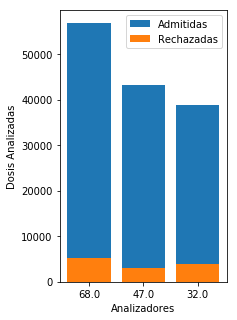

In [35]:
plt.figure(figsize=(3,5))
plt.bar([i for i in range(3)], top3_analizadores['DOSIS_ADMITIDAS'], label = 'Admitidas')
plt.bar([i for i in range(3)], top3_analizadores['DOSIS_RECHAZADAS'], label = 'Rechazadas')
plt.xticks([i for i in range(3)], top3_analizadores.index)
plt.xlabel('Analizadores')
plt.ylabel('Dosis Analizadas')
plt.legend();

In [36]:
resto_analizadores = df_analizadores.iloc[3:14]
resto_analizadores.to_excel('resto_analizadores.xlsx')

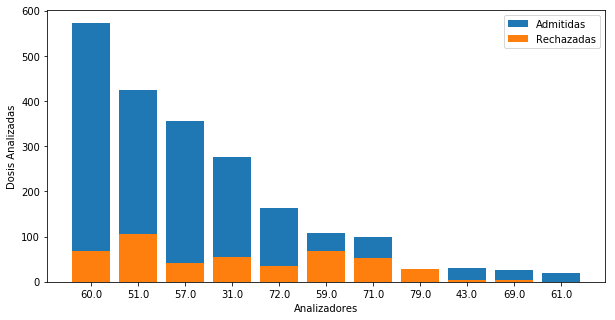

In [37]:
plt.figure(figsize=(10,5))
plt.bar([i for i in range(resto_analizadores.shape[0])], resto_analizadores['DOSIS_ADMITIDAS'], label = 'Admitidas')
plt.bar([i for i in range(resto_analizadores.shape[0])], resto_analizadores['DOSIS_RECHAZADAS'], label = 'Rechazadas')
plt.xticks([i for i in range(resto_analizadores.shape[0])], resto_analizadores.index)
plt.xlabel('Analizadores')
plt.ylabel('Dosis Analizadas')
plt.legend();

**El resto de analizadores (78, 38, 73, 55, 62, 81, 56, 58) no han realizado análisis suficientes como para tenerlos en cuenta en el estudio**

**Se pide hacer un estudio de las dosis rechazadas según formas anormales, para lo cual se ha elaborado el % que suponen las formas anormales en el total de los rechazos (%FORMAS_ANORMALES)** 

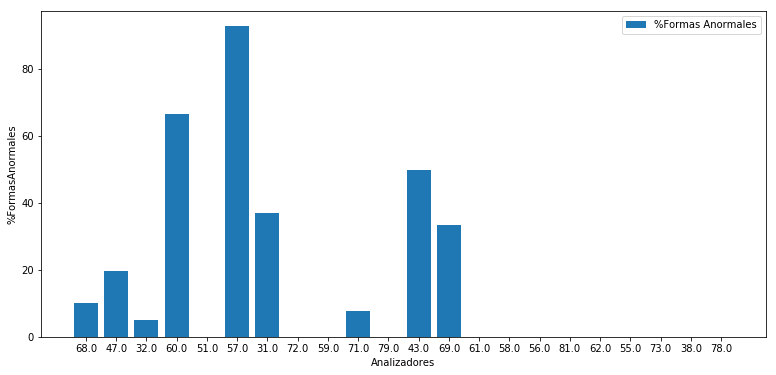

In [38]:
plt.figure(figsize=(13,6))
plt.bar([i for i in range(df_analizadores.shape[0])], df_analizadores['%FORMAS_ANORMALES'], label = '%Formas Anormales')
plt.xticks([i for i in range(df_analizadores.shape[0])], df_analizadores.index)
plt.xlabel('Analizadores')
plt.ylabel('%FormasAnormales')
plt.legend();

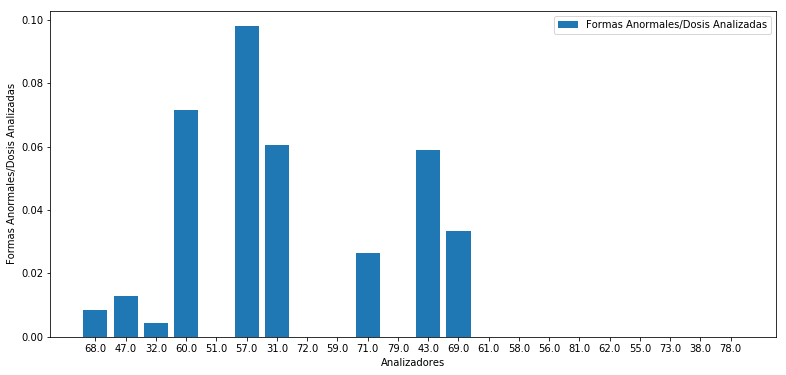

In [39]:
plt.figure(figsize=(13,6))
plt.bar([i for i in range(df_analizadores.shape[0])], df_analizadores['FORMAS_ANORMALES/ANALIZADAS'], label = 'Formas Anormales/Dosis Analizadas')
plt.xticks([i for i in range(df_analizadores.shape[0])], df_analizadores.index)
plt.xlabel('Analizadores')
plt.ylabel('Formas Anormales/Dosis Analizadas')
plt.legend();

In [44]:
info = df.groupby(['ANALIZADOR', 'CENTRO'])['ANALIZADOR'].count()
info = pd.DataFrame(info)
info

ANALIZADOR
ANALIZADOR CENTRO            
31         CAL            331
32         CAL          29031
           PEÑAS        12734
           TOL            890
38         CAL              1
43         CAL             25
           PEÑAS            8
           TOL              1
47         CAL          34671
           PEÑAS        10310
           TOL           1366
51         CAL            530
55         CAL              1
56         CAL              3
57         CAL            398
58         PEÑAS            7
59         CAL            176
60         CAL            642
61         CAL             16
           PEÑAS            4
62         CAL              1
68         CAL          34048
           PEÑAS        25736
           TOL           2350
69         CAL             12
           PEÑAS           18
71         CAL            103
           PEÑAS           49
72         CAL            136
           PEÑAS           53
           TOL             10
73         CAL              1
78         CAL              1
79         CAL             30
           PEÑAS            4
81         CAL              1
           PEÑAS            1

In [41]:
df['CENTRO'].unique()

array(['CAL', 'PEÑAS', 'TOL'], dtype=object)

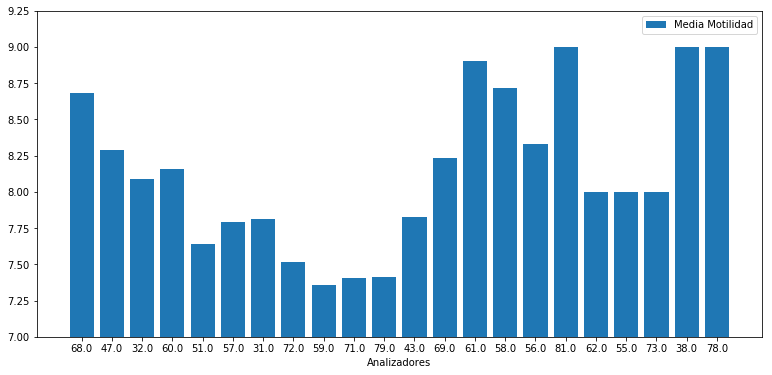

In [42]:
plt.figure(figsize=(13,6))
plt.bar([i for i in range(df_analizadores.shape[0])], df_analizadores['MEDIA_MOTILIDAD'], label = 'Media Motilidad')
plt.ylim([7, 9.25])
plt.xticks([i for i in range(df_analizadores.shape[0])], df_analizadores.index)
plt.xlabel('Analizadores')
plt.legend();

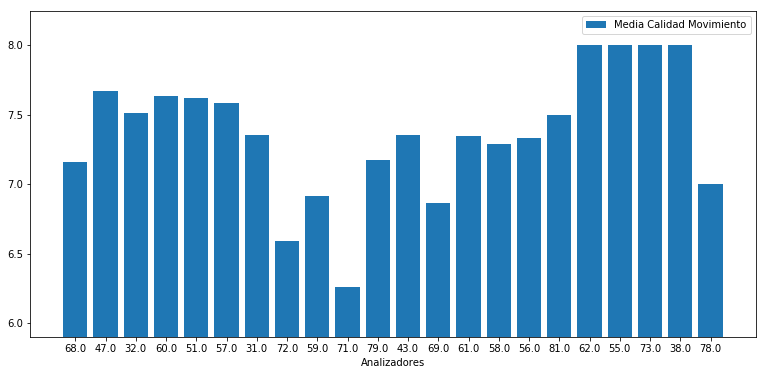

In [43]:
plt.figure(figsize=(13,6))
plt.bar([i for i in range(df_analizadores.shape[0])], df_analizadores['MEDIA_CALIDAD_MOVIMIENTO'], label = 'Media Calidad Movimiento')
plt.ylim([5.9, 8.25])
plt.xticks([i for i in range(df_analizadores.shape[0])], df_analizadores.index)
plt.xlabel('Analizadores')
plt.legend();

**Las conclusiones obtenidas se recogen en la memoria del proyecto**